# Plotting


**Outcomes**

- Understand components of matplotlib plots  
- Make basic plots  

## Outline

- [Plotting](#Plotting)  
  - [Visualization](#Visualization)  
  - [`matplotlib`](#`matplotlib`)  

In [1]:
# Uncomment following line to install on colab
#! pip install qeds

## Visualization

One of the most important outputs of your analysis will be the visualizations that you choose to
communicate what you’ve discovered.

Here are what some people – whom we think have earned the right to an opinion on this
material – have said with respect to data visualizations.

> Above all else, show the data – Edward Tufte

> By visualizing information, we turn it into a landscape that you can explore with your eyes. A sort of information map. And when you’re lost in information, an information map is kind of useful – David McCandless

> I spend hours thinking about how to get the story across in my visualizations. I don’t mind taking that long because it’s that five minutes of presenting it or someone getting it that can make or break a deal – Goldman Sachs executive




We won’t have time to cover “how to make a compelling data visualization” in this lecture.

Instead, we will focus on the basics of creating visualizations in Python.

This will be a fast introduction, but this material appears in almost every
lecture going forward, which will help the concepts sink in.

In almost any profession that you pursue, much of what you do involves communicating ideas to others.

Data visualization can help you communicate these ideas effectively, and we encourage you to learn
more about what makes a useful visualization.

We include some references that we have found useful below.

- [The Functional Art: An introduction to information graphics and visualization](https://www.amazon.com/The-Functional-Art-introduction-visualization/dp/0321834739/) by Alberto Cairo  
- [The Visual Display of Quantitative Information](https://www.amazon.com/Visual-Display-Quantitative-Information/dp/1930824130) by Edward Tufte  
- [The Wall Street Journal Guide to Information Graphics: The Dos and Don’ts of Presenting Data, Facts, and Figures](https://www.amazon.com/Street-Journal-Guide-Information-Graphics/dp/0393347281) by Dona M Wong  
- [Introduction to Data Visualization](http://paldhous.github.io/ucb/2016/dataviz/index.html)  

## `matplotlib`

The most widely used plotting package in Python is matplotlib.

The standard import alias is

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Note above that we are using `matplotlib.pyplot` rather than just `matplotlib`.

`pyplot` is a sub-module found in some large packages to further organize functions and types. We are able to give the `plt` alias to this sub-module.

Additionally, when we are working in the notebook, we need tell matplotlib to display our images
inside of the notebook itself instead of creating new windows with the image.

This is done by

In [2]:
%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

The commands with `%` before them are called [Magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

### First Plot

Let’s create our first plot!

After creating it, we will walk through the steps one-by-one to understand what they do.

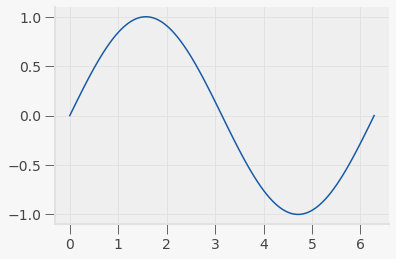

In [3]:
# Step 1
fig, ax = plt.subplots()

# Step 2
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# Step 3
ax.plot(x, y)

1. Create a figure and axis object which stores the information from our graph.  
1. Generate data that we will plot.  
1. Use the `x` and `y` data, and make a line plot on our axis, `ax`, by calling the `plot` method.  

### Matplotlib’s Split Personality

Matplotlib is unusual in that it offers two different interfaces to plotting.

One is a simple MATLAB-style API (Application Programming Interface) that was written to help MATLAB refugees find a ready home.

The other is a more “Pythonic” object-oriented API.

For reasons described below, we recommend that you use the second API.

But first, let’s discuss the difference.

## The APIs


<a id='index-2'></a>

### The MATLAB-style API

Here’s the kind of easy example you might find in introductory treatments

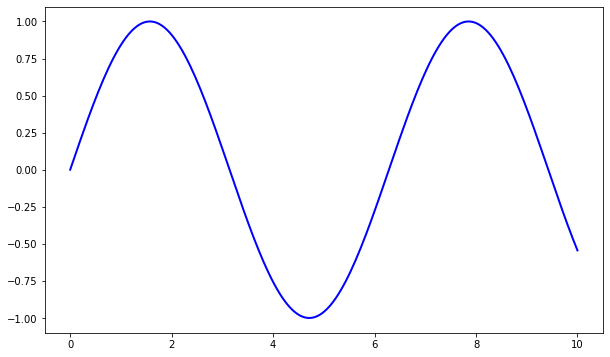

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6) #set default figure size
import numpy as np

x = np.linspace(0, 10, 200)
y = np.sin(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.show()

This is simple and convenient, but also somewhat limited and un-Pythonic.

For example, in the function calls, a lot of objects get created and passed around without making themselves known to the programmer.

This leads us to the alternative, object-oriented Matplotlib API.

### The Object-Oriented API

Here’s the code corresponding to the preceding figure using the object-oriented API

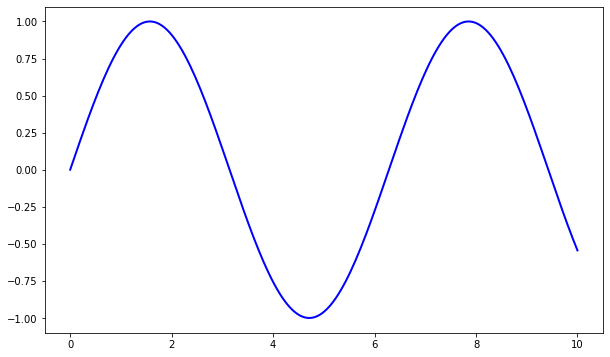

In [2]:
fig, ax = plt.subplots()
ax.plot(x, y, 'b-', linewidth=2)
plt.show()

Here the call `fig, ax = plt.subplots()` returns a pair, where

- `fig` is a `Figure` instance—like a blank canvas.  
- `ax` is an `AxesSubplot` instance—think of a frame for plotting in.  


The `plot()` function is actually a method of `ax`.

While there’s a bit more typing, the more explicit use of objects gives us better control.

This will become more clear as we go along.

### Tweaks

Here we’ve changed the line to red and added a legend

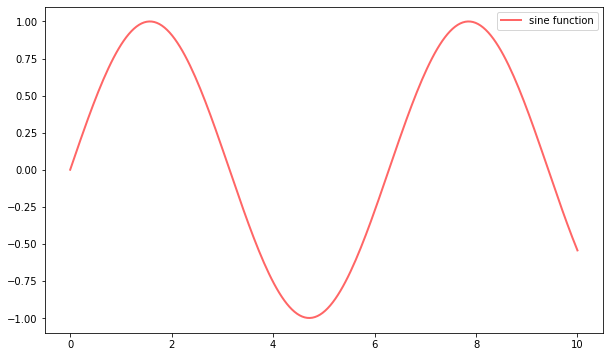

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend()
plt.show()

We’ve also used `alpha` to make the line slightly transparent—which makes it look smoother.

The location of the legend can be changed by replacing `ax.legend()` with `ax.legend(loc='upper center')`.

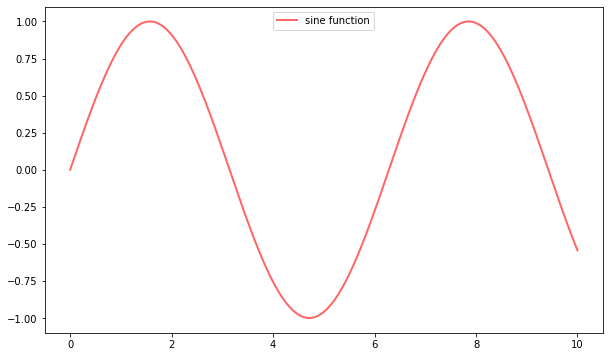

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

If everything is properly configured, then adding LaTeX is trivial

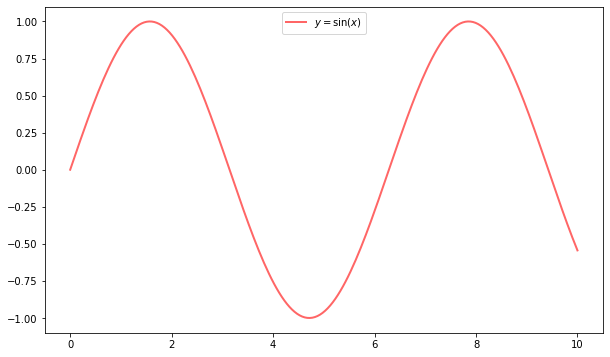

In [8]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

Controlling the ticks, adding titles and so on is also straightforward

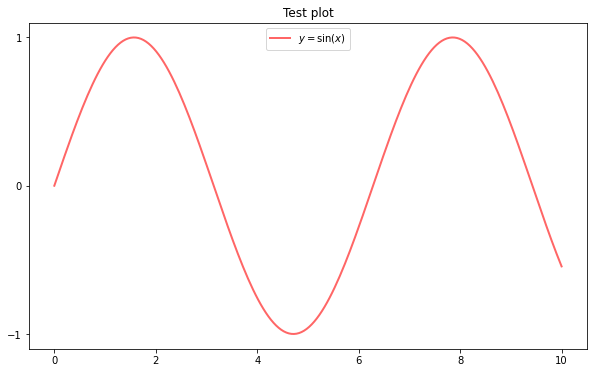

In [9]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
ax.set_yticks([-1, 0, 1])
ax.set_title('Test plot')
plt.show()

## Difference between Figure and Axis

We’ve found that the easiest way for us to distinguish between the figure and axis objects is to
think about them as a framed painting.

The axis is the canvas; it is where we “draw” our plots.

The figure is the entire framed painting (which inclues the axis itself!).

We can also see this by setting certain elements of the figure to different colors.

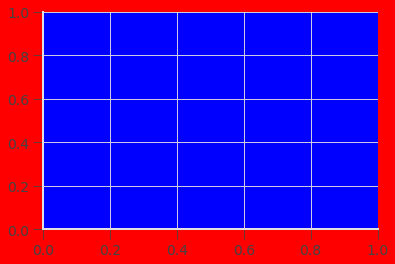

In [4]:
fig, ax = plt.subplots()

fig.set_facecolor("red")
ax.set_facecolor("blue")

This difference also means that you can place more than one axis on a figure.

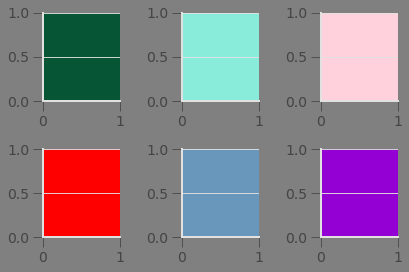

In [5]:
# We specified the shape of the axes -- It means we will have two rows and three columns
# of axes on our figure
fig, axes = plt.subplots(2, 3)

fig.set_facecolor("gray")

# Can choose hex colors
colors = ["#065535", "#89ecda", "#ffd1dc", "#ff0000", "#6897bb", "#9400d3"]

# axes is a numpy array and we want to iterate over a flat version of it
for (ax, c) in zip(axes.flat, colors):
    ax.set_facecolor(c)

fig.tight_layout()

## More Features 

Matplotlib has a huge array of functions and features, which you can discover
over time as you have need for them.

We mention just a few.

### Multiple Plots on One Axis 


<a id='index-3'></a>
It’s straightforward to generate multiple plots on the same axes.

Here’s an example that randomly generates three normal densities and adds a label with their mean

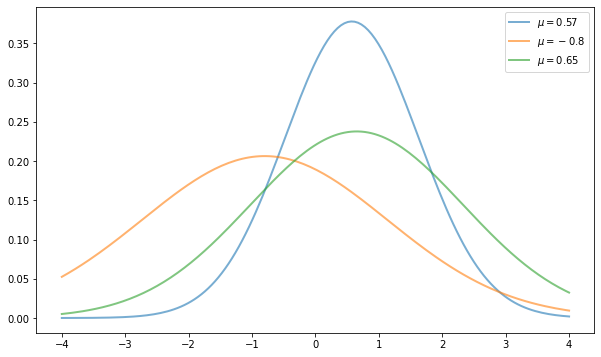

In [10]:
from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

### Multiple Subplots 


<a id='index-4'></a>
Sometimes we want multiple subplots in one figure.

Here’s an example that generates 6 histograms

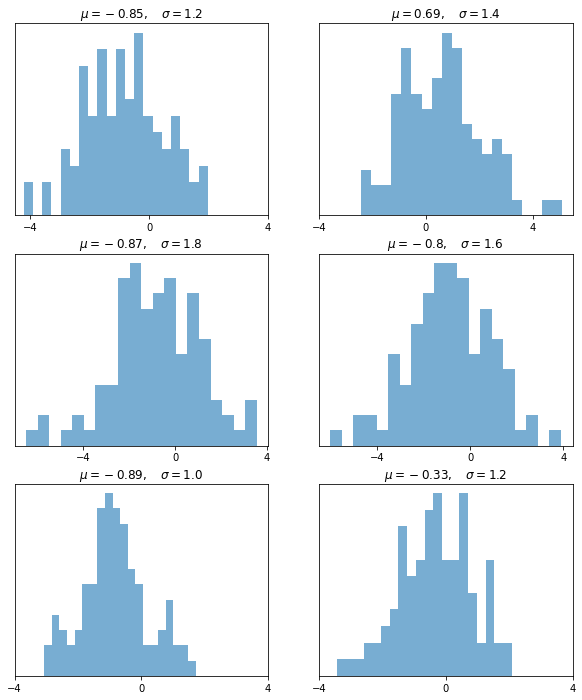

In [11]:
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = f'$\mu = {m:.2}, \quad \sigma = {s:.2}$'
        axes[i, j].set(title=t, xticks=[-4, 0, 4], yticks=[])
plt.show()

### 3D Plots (opt)


<a id='index-5'></a>
Matplotlib does a nice job of 3D plots — here is one example

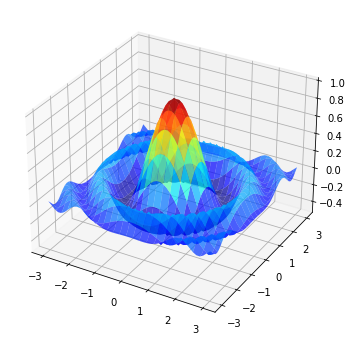

In [12]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm


def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
plt.show()


### Bar (opt)

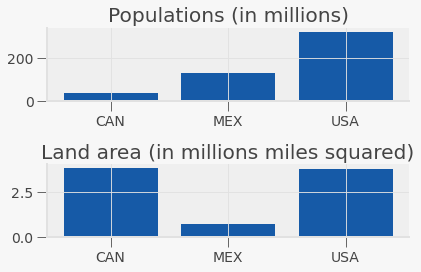

In [6]:
countries = ["CAN", "MEX", "USA"]
populations = [36.7, 129.2, 325.700]
land_area = [3.850, 0.761, 3.790]

fig, ax = plt.subplots(2)

ax[0].bar(countries, populations, align="center")
ax[0].set_title("Populations (in millions)")

ax[1].bar(countries, land_area, align="center")
ax[1].set_title("Land area (in millions miles squared)")

fig.tight_layout()

### Scatter and annotation

Text(25, -25, 'First point')

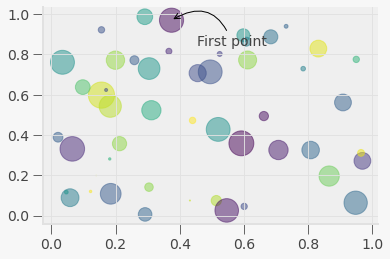

In [7]:
N = 50

np.random.seed(42)

x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

fig, ax = plt.subplots()

ax.scatter(x, y, s=area, c=colors, alpha=0.5)

ax.annotate(
    "First point", xy=(x[0], y[0]), xycoords="data",
    xytext=(25, -25), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.6")
)

### Fill between (opt)

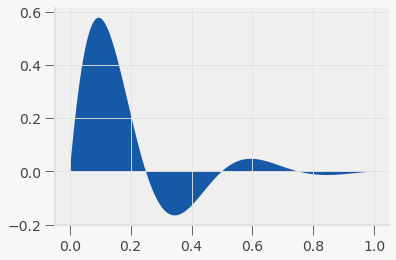

In [8]:
x = np.linspace(0, 1, 500)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

fig, ax = plt.subplots()

ax.grid(True)
ax.fill(x, y)

### A Customizing Function (opt)

Perhaps you will find a set of customizations that you regularly use.

Suppose we usually prefer our axes to go through the origin, and to have a grid.

Here’s a nice example from [Matthew Doty](https://github.com/xcthulhu) of how the object-oriented API can be used to build a custom `subplots` function that implements these changes.

Read carefully through the code and see if you can follow what’s going on

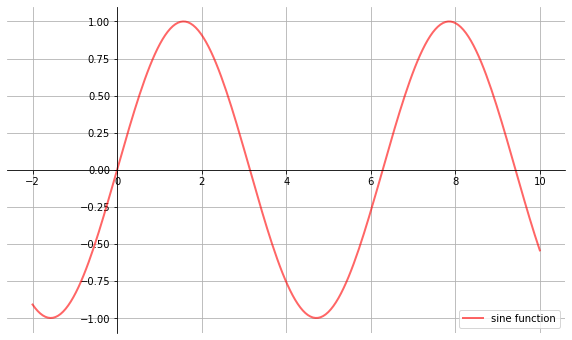

In [13]:
def subplots():
    "Custom subplots with axes through the origin"
    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.grid()
    return fig, ax


fig, ax = subplots()  # Call the local version, not plt.subplots()
x = np.linspace(-2, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='lower right')
plt.show()

The custom `subplots` function

1. calls the standard `plt.subplots` function internally to generate the `fig, ax` pair,  
1. makes the desired customizations to `ax`, and  
1. passes the `fig, ax` pair back to the calling code.  

## Further Reading

- The [Matplotlib gallery](http://matplotlib.org/gallery.html) provides many examples.  
- A nice [Matplotlib tutorial](http://scipy-lectures.org/intro/matplotlib/index.html) by Nicolas Rougier, Mike Muller and Gael Varoquaux.  
- [mpltools](http://tonysyu.github.io/mpltools/index.html) allows easy
  switching between plot styles.  
- [Seaborn](https://github.com/mwaskom/seaborn) facilitates common statistics plots in Matplotlib.  

## Exercises

### Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![https://python-programming.quantecon.org/_static/lecture_specific/matplotlib/matplotlib_ex1.png](https://python-programming.quantecon.org/_static/lecture_specific/matplotlib/matplotlib_ex1.png)